About Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


dataset link : https://www.kaggle.com/datasets/uciml/iris

List of kernels for newcomers
Hello !

I have noticed that in it's simplicity iris dataset has become a host to many kernels perfect for beginners. The problem is there are also many kernels which add nothing new to the general idea and hide the shiny pearls.

In this post I would like to create a list of kernels which should be essential reads for the new data analysts or which showcase a very innovative approach to the problem.

Please add your suggestions in this thread and I will try to update the list regularly.

Task:
1.Choose a classification dataset and normalize features.

2.Use KNeighborsClassifier from sklearn.

3.Experiment with different values of K.

4.Evaluate model using accuracy, confusion matrix.

5.Visualize decision boundaries.


# importing require libraries 

In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay, confusion_matrix

In [2]:
iris_data = pd.read_csv("Iris.csv")

In [5]:
print("Top 10 rows :\n")
iris_data.head(10)

Top 10 rows :



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
Total_Rows = iris_data.shape[0]
Total_Cols = iris_data.shape[1]
print("Total Rows is :",Total_Rows)
print("Total columns is :", Total_Cols)

Total Rows is : 150
Total columns is : 6


In [7]:
print( "\n Information about the Titanic dataset : \n " )
iris_data.info()


 Information about the Titanic dataset : 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


information on the data :

Total rows is 150 and starting indexing is o to 149.
Total columns is 6.
no null value here.
data types : 1 columns is int and 4 is float, target variable is  object values in data set.


# Columns distribution

In [62]:
feature_cols =  iris_data.columns.tolist()
print("Total columns is here :\n", iris_data.columns.tolist())

Total columns is here :
 ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [9]:
numerical_col = iris_data.select_dtypes(include=["int64","float64"]).columns
print("Total Numerical columns list is here :\n", numerical_col)
print("\nTotal Numerical columns is here :\n" ,numerical_col.value_counts().sum())

Total Numerical columns list is here :
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

Total Numerical columns is here :
 5


In [10]:
categorical_col = iris_data.select_dtypes(include=["O"]).columns
print("Total categorical columns  list is here :\n", categorical_col)
print("\nTotal categorical columns is here :\n" ,categorical_col.value_counts().sum())

Total categorical columns  list is here :
 Index(['Species'], dtype='object')

Total categorical columns is here :
 1


# basic statistics about the Iris data :

In [11]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [12]:
iris_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,150.0,NaN,NaN,NaN,75.5,43.445368,1.0,38.25,75.5,112.75,150.0
SepalLengthCm,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
iris_data.describe(include="O").T

,count,unique,top,freq
Species,150,3,Iris-setosa,50


# Visualizations:

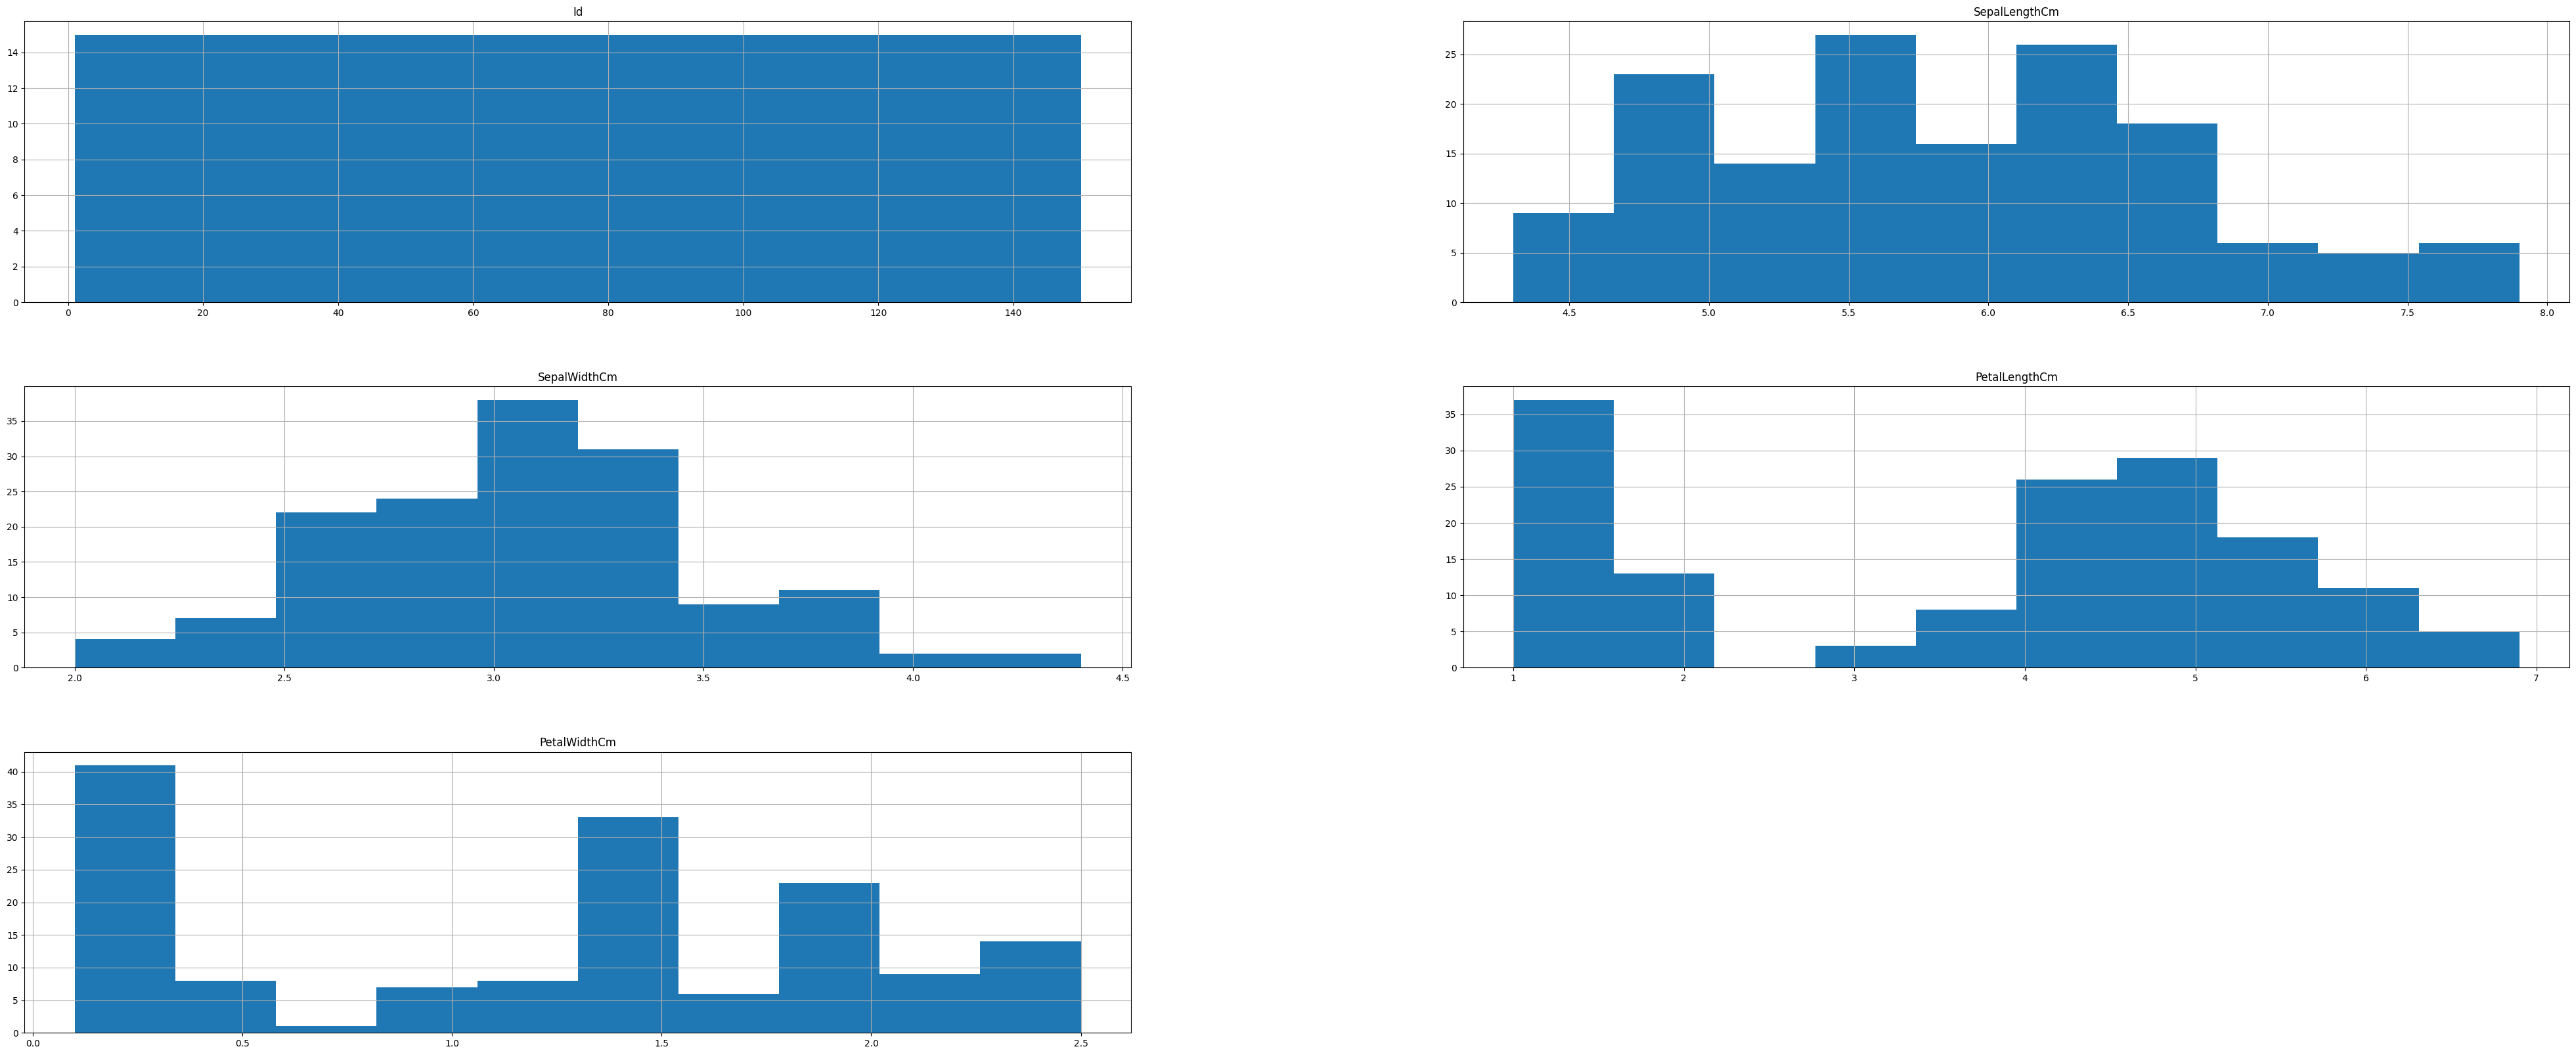

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

iris_data.hist(numerical_col, figsize=(50,20))

plt.ylabel("Frequency")

plt.show()

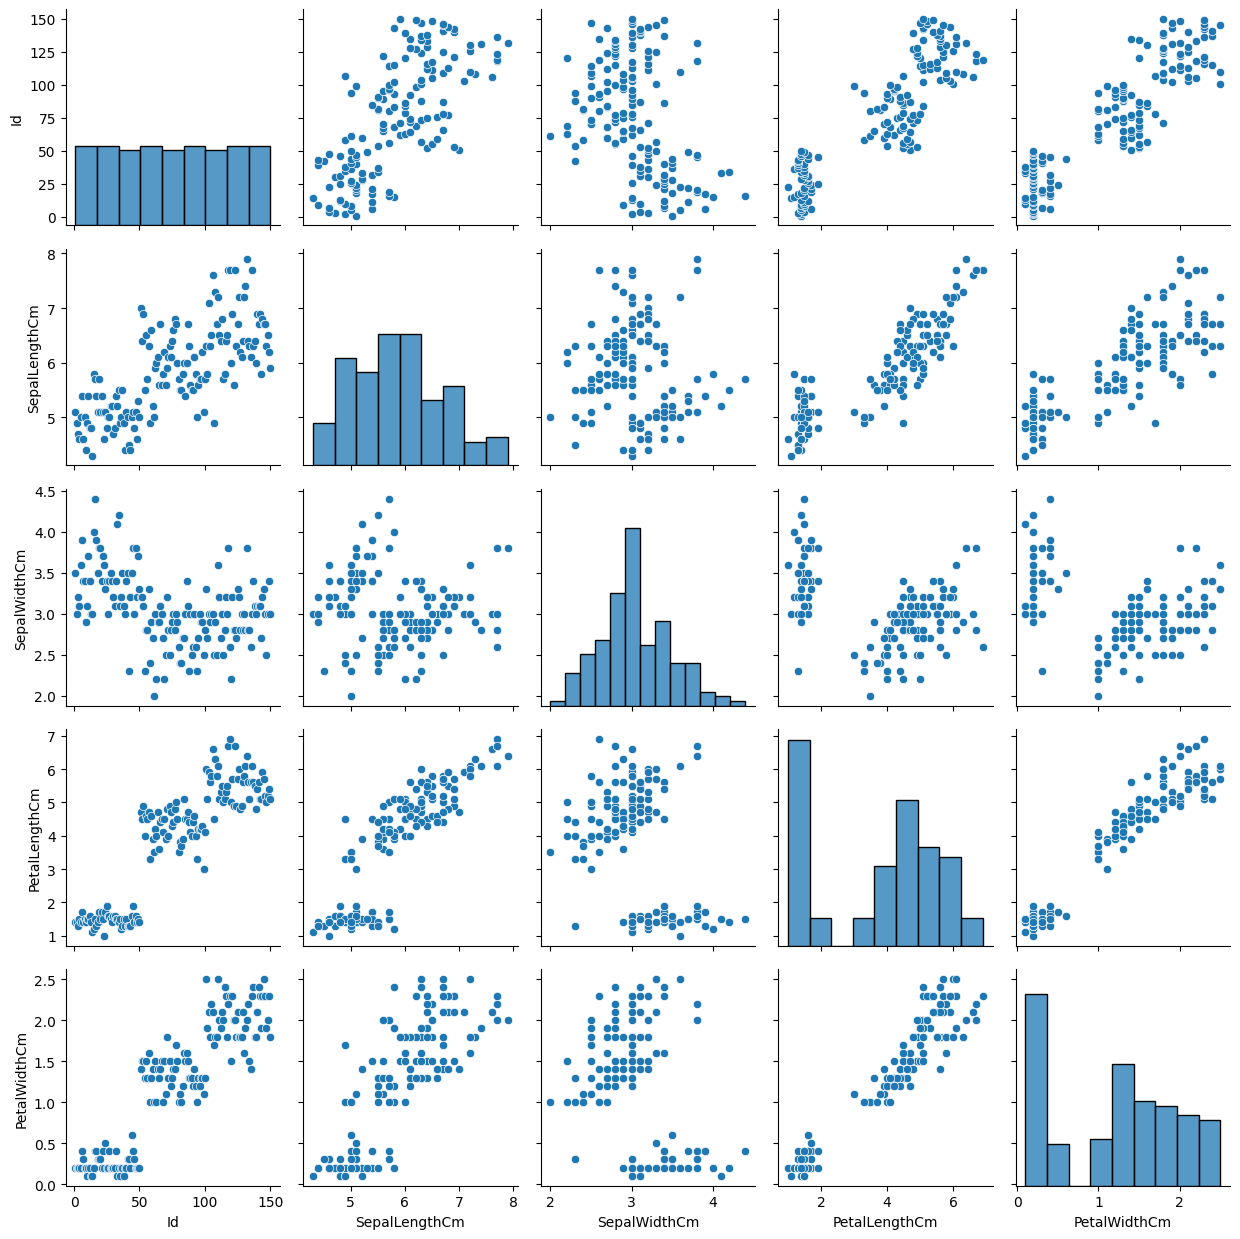

In [19]:
sns.pairplot(iris_data)
plt.tight_layout()
plt.show()

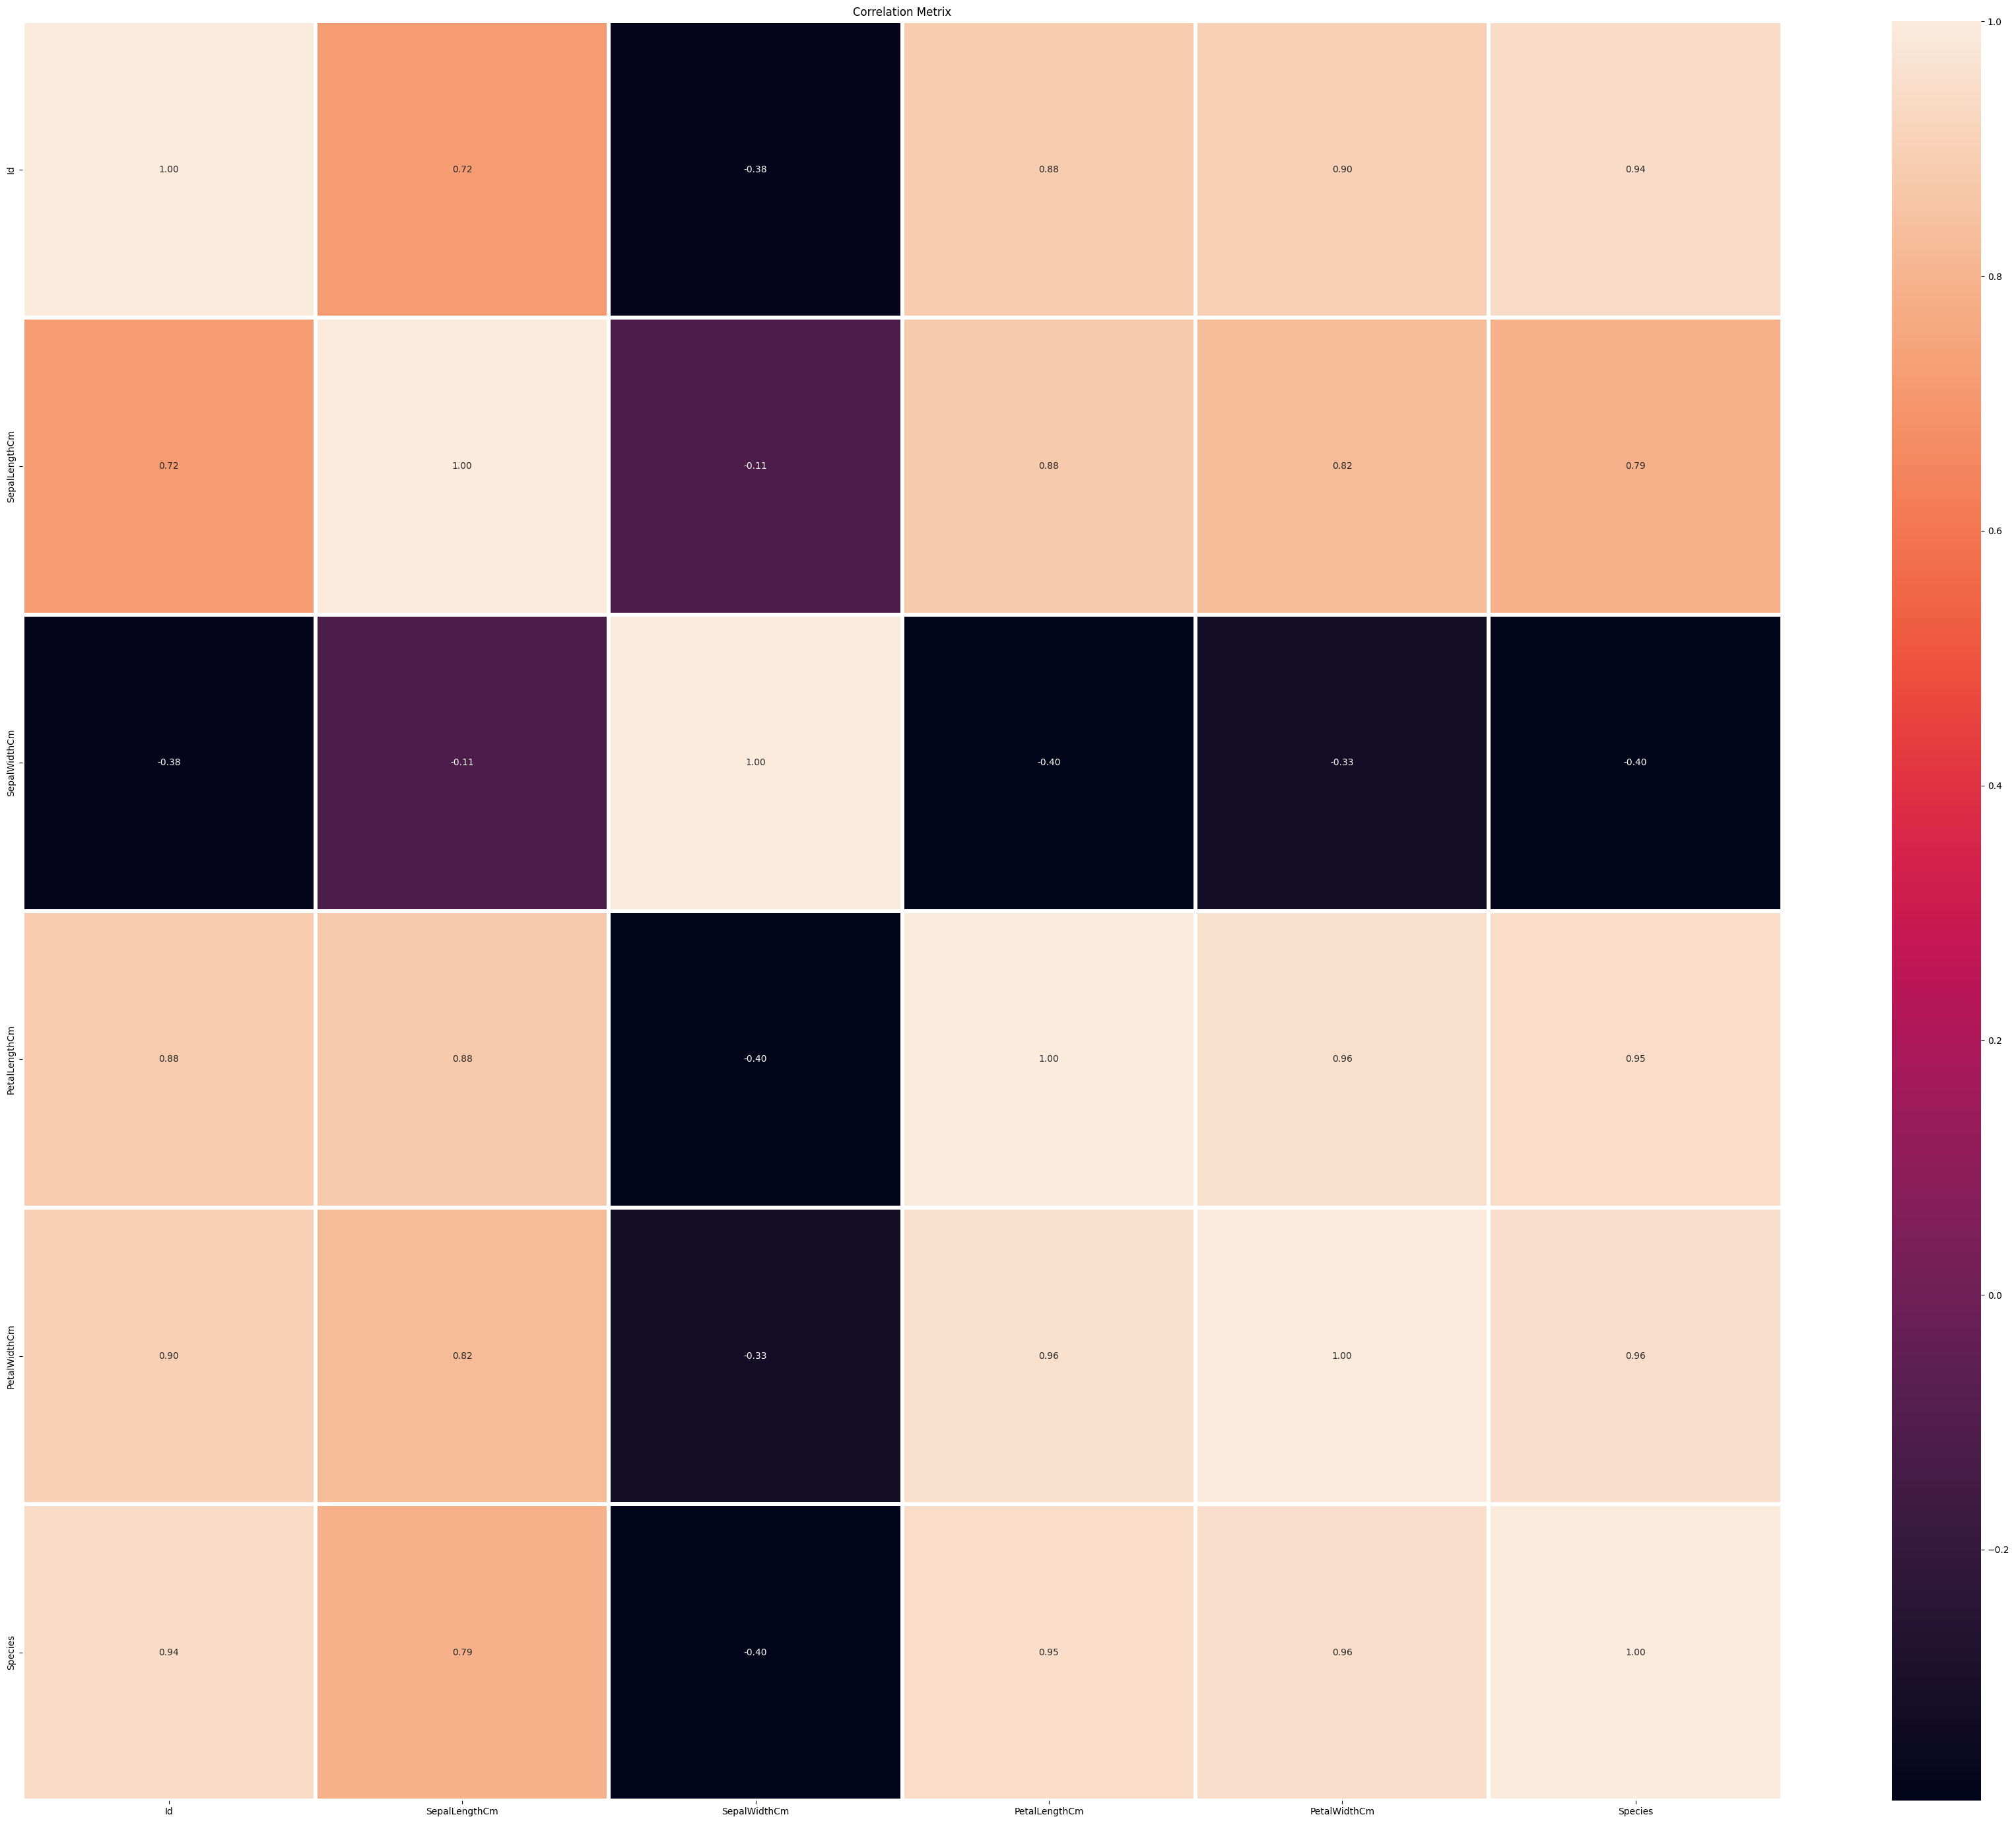

In [108]:
correlation = iris_data.corr(numeric_only=True)

plt.figure(figsize=(43,35))
sns.heatmap(correlation ,linewidths="4" ,annot=True , fmt=".2f",)
plt.title("Correlation Metrix")

plt.show()

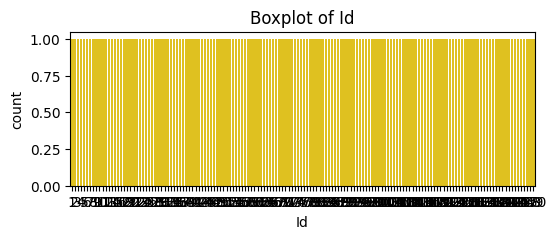

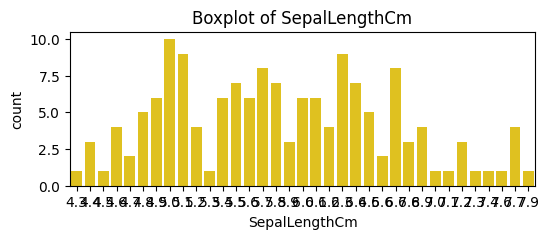

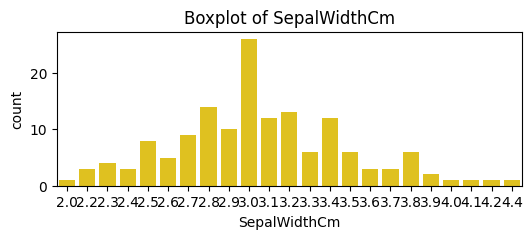

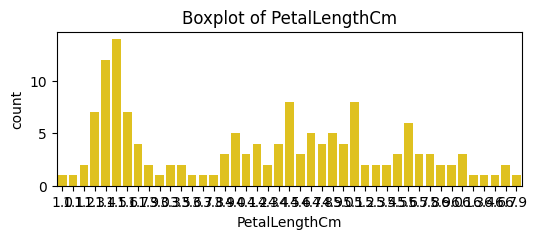

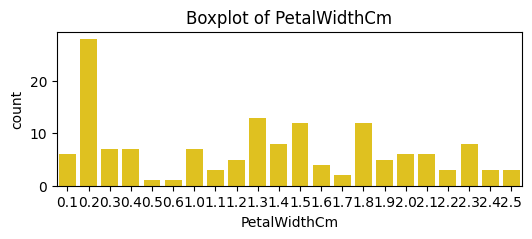

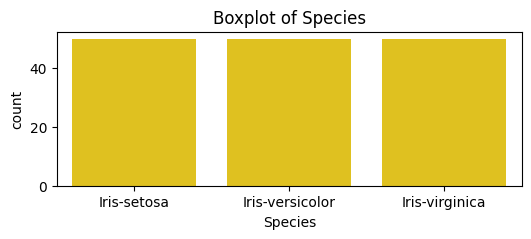

In [34]:
for col in iris_data:
    plt.figure(figsize=(6,2))
    sns.countplot(x=iris_data[col],color="gold")
    plt.title(f"Boxplot of {col}")
    plt.show()

# Preprocessing :

# 1. Handle null values:

In [35]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

its clearly watching you not missing value in dataset

# 2. Handle category values :

In [37]:
lb = LabelEncoder()

iris_data.Species= lb.fit_transform(iris_data.Species)
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


# 3. detect Outlines and Remove

In [38]:
for i in iris_data:
    q1 = iris_data[i].quantile(0.25)
    q3 = iris_data[i].quantile(0.75)
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    iris_data = iris_data [(iris_data[i] >= lower) & (iris_data[i ] <= upper)]

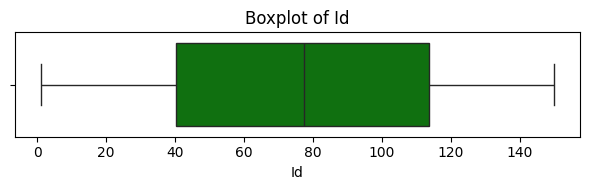

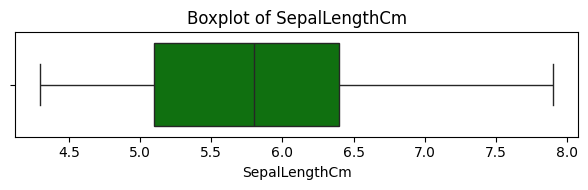

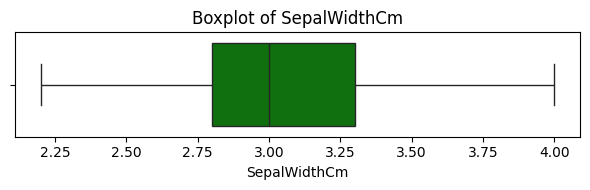

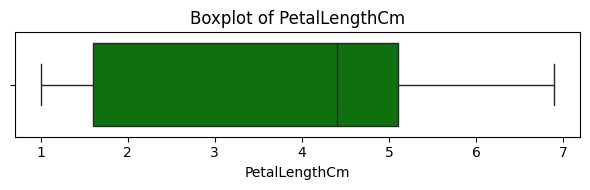

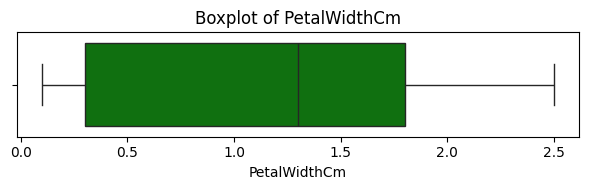

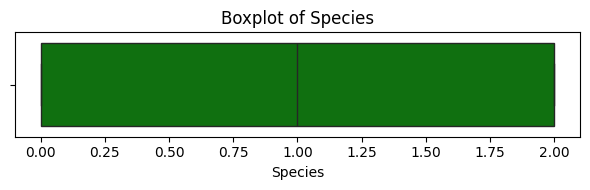

In [39]:
for col in iris_data:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=iris_data[col], color="green")
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

-> not outliers visible in data set. -> data to clear and ready to go for the next steps

# Feature Engineering:

In [96]:
x = iris_data.drop("Species",axis=1)
y = iris_data.Species

x = x[["SepalLengthCm", "PetalLengthCm"]] 
x_train,x_test,y_train,y_test = train_test_split(x ,y, test_size=0.2 , random_state=42)


We chose only two features (sepal_length and petal_length) from the dataset to reduce dimensionality for easy visualization.

KNN requires all features used in training to be present during prediction — so decision boundary can only be plotted in 2D if the model is trained with 2D inputs.

In [97]:
y.value_counts()

Species
2    50
1    49
0    47
Name: count, dtype: int64

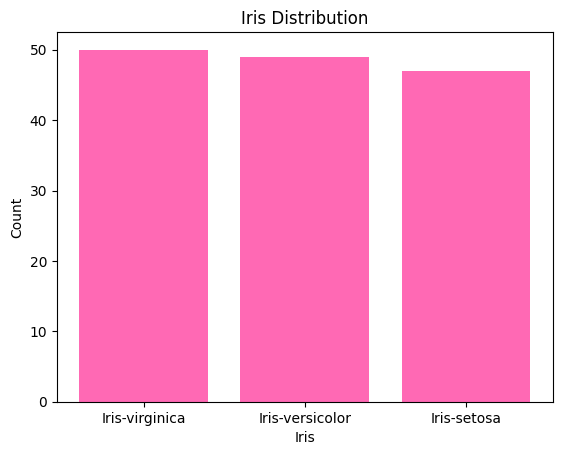

In [98]:
target_var = y.map({0: "Iris-setosa", 1: "Iris-versicolor",2: "Iris-virginica"}).value_counts()

plt.bar(target_var.index, target_var.values, color="hotpink")
plt.xlabel("Iris")
plt.ylabel("Count")
plt.title("Iris Distribution")
plt.show()

# Feature Scaling:

In [99]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


We split the data into training and test sets.

Then we applied StandardScaler to normalize the feature values. This is critical for distance-based algorithms like KNN, as different scales can distort nearest neighbor calculations.

# Experiment with Different Values of K

In [100]:

k_values = range(1, 11)
accuracy = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    
    accuracy.append(acc)
    print(f"K={k} -> Accuracy: {acc:.2f}")

K=1 -> Accuracy: 0.83
K=2 -> Accuracy: 0.83
K=3 -> Accuracy: 0.90
K=4 -> Accuracy: 0.93
K=5 -> Accuracy: 0.93
K=6 -> Accuracy: 0.90
K=7 -> Accuracy: 0.90
K=8 -> Accuracy: 0.93
K=9 -> Accuracy: 0.93
K=10 -> Accuracy: 0.90


This loop checks how the accuracy of KNN changes as the value of k (number of neighbors) increases from 1 to 10.



<!-- Confusion Matrix for Best K -->

Small k (e.g., 1): Model may overfit — too sensitive to noise.

Large k (e.g., 9-10): Model may underfit — too generalized.

Best k: Highest accuracy value in the output. Use this for final model.

In [101]:
best_k = k_values[np.argmax(accuracy)]
print(f"\nBest K: {best_k}")


Best K: 4


In [102]:
y_pred

array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 1, 2, 2, 0], dtype=int64)

In [103]:
# Retrain with best K
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

# Confusion Matrix for Best K

In [104]:
# Select best K based on max accuracy
best_k = k_values[np.argmax(accuracy)]
print(f"\nBest K: {best_k}")

# Retrain using best K
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(x_train, y_train)
y_pred_best = best_model.predict(x_test)

y_pred_best
print(best_k)


Best K: 4
4


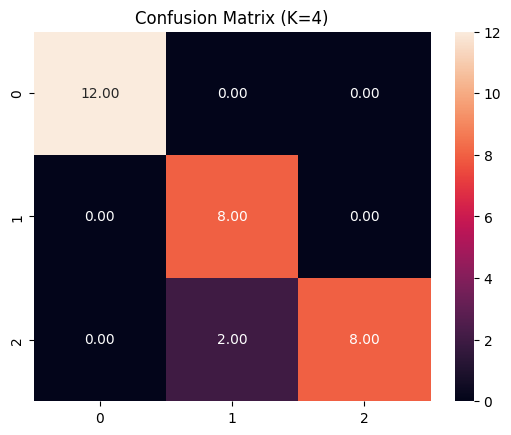

In [105]:
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm ,annot= True,fmt=".2f")
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()


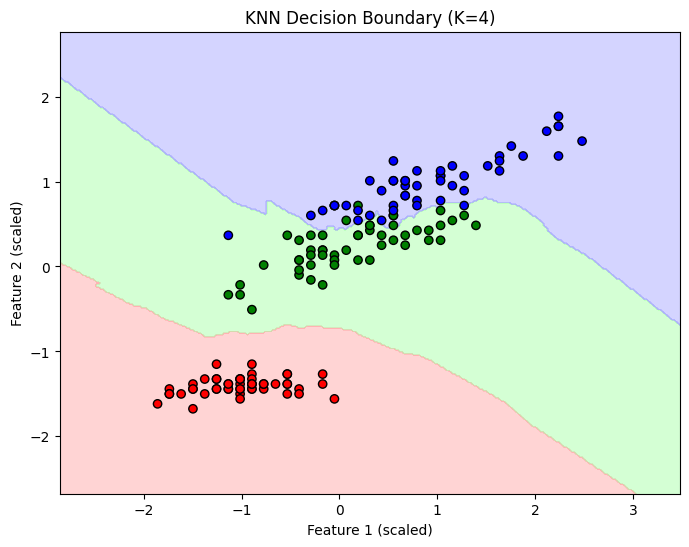

In [110]:
# Decision Boundary Plot
X_vis = np.vstack((x_train, x_test))
y_vis = np.hstack((y_train, y_test))

h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"]), alpha=0.5)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=ListedColormap(["red", "green", "blue"]), edgecolor="k")
plt.title(f"KNN Decision Boundary (K={best_k})")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

This plot only works properly if your data has exactly 2 features.

If your dataset has more features (like the Iris dataset with 4 features), you must select two features or reduce dimensionality (e.g., PCA) before plotting.

If you train KNN on all features but try to plot using just 2 features, you’ll get an error because the model expects the same number of features it was trained on.

